In [19]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import pysal

shapefile = 'bokeh-app/data/countries_110m/ne_10m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#shp = pysal.open(shapefile)
#W = pysal.weights.Queen.from_shapefile(shp)
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
#gdf = gdf.drop(gdf.index[159]) # The width of the map

# #Drop row corresponding to 'Antarctica'
datafile = 'bokeh-app/data/data1.csv'
data=pd.read_csv(datafile,usecols=[0,1,2,3],names=['country','normalization','number','count'])# import data
print(data['normalization'])

0      0.010192
1      0.006795
2      0.276881
3      0.370307
4      0.015288
         ...   
239    0.005096
240    0.001699
241    0.013589
242    0.005096
243    0.010192
Name: normalization, Length: 244, dtype: float64


In [20]:
print(gdf)

                          country country_code  \
0                       Indonesia          IDN   
1                        Malaysia          MYS   
2                           Chile          CHL   
3                         Bolivia          BOL   
4                            Peru          PER   
..                            ...          ...   
253                   Macao S.A.R          MAC   
254   Ashmore and Cartier Islands          ATC   
255  Bajo Nuevo Bank (Petrel Is.)          BJN   
256               Serranilla Bank          SER   
257              Scarborough Reef          SCR   

                                              geometry  
0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...  
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...  
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...  
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...  
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...  
..                                                 ...  


In [21]:
gdf=gdf.reset_index(drop=True)

In [22]:
gdf.to_csv('country.csv')

In [23]:
from shapely.geometry import Polygon

n = len(gdf)
adjacency_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i + 1, n):
        try:
            if gdf.geometry[i].intersects(gdf.geometry[j]):
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1
        except:
            print(j)

In [24]:
news_volume=np.array(data['normalization'])

In [25]:
np.array([100,200,300])

array([100, 200, 300])

In [26]:
adjacency_matrix

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Moran部分

## normalization列实际为容量占比，N3=C3/SUM(C:C)

In [65]:
import geopandas as gpd
shapefile = 'bokeh-app/data/countries_110m/ne_10m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
#为了后面的莫兰计算，需要人工去除一些数据，保证纬度一致
dropformoran=[172,226,175,254,255,171,174,139,229,252,250,184,169,6,216,228,231,192,209,
              37,257,256,170,38,241,173,251,204,133,167]

gdf = gdf.drop(dropformoran) # The width of the map
gdf=gdf.reset_index(drop=True)

In [66]:
gdf

,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...
223,Palau,PLW,"MULTIPOLYGON (((134.27149 7.07453, 134.27931 7..."
224,Guam,GUM,"POLYGON ((144.88640 13.64020, 144.89666 13.617..."
225,Northern Mariana Islands,MNP,"MULTIPOLYGON (((145.20574 14.18138, 145.25245 ..."
226,Bahrain,BHR,"MULTIPOLYGON (((50.55161 26.19424, 50.59474 26..."


In [67]:
gdf.to_csv('country.csv')

In [68]:
# #Drop row corresponding to 'Antarctica'
#注意id顺序
datafile = 'bokeh-app/data/data3.csv'
data=pd.read_csv(datafile,usecols=[0,1,2,3],names=['country','normalization','number','count'])# import data
print(data['normalization'])
y=data['normalization']

0      0.002395
1      0.004688
2      0.000527
3      0.000085
4      0.001053
         ...   
223    0.000102
224    0.001155
225    0.001648
226    0.000408
227    0.000051
Name: normalization, Length: 228, dtype: float64


In [69]:
from esda.moran import Moran
from pysal.lib import weights
w = weights.Queen.from_dataframe(gdf) ###############权重
#y =gdf.z ##########特征点
moran = Moran(y,w)
moran.I      ####### Moran 值

('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 162, ' is an island (no neighbors)')
('WARNING: ', 163, ' is an island (no neighbors)')
('WARNING: ', 164, ' is an island (no neighbors)')
('WARNING: ', 165, ' is an island (no neighbors)')
('WARNING: ', 166, ' is an island (no neighbors)')
('WARNING: ', 167, ' is an island (no neighbors)')
('WARNING: ', 168, ' is an island (no neighbors)')
('WARNING: ', 169, ' is an island (no neighbors)')
('WARNING: ', 170, ' is an island (no neighbors)')
('WARNING: ', 171, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 173, ' is an island (no neighbors)')
('WARNING: ', 174, ' is an island (no neighbors)')
('WARNING: ', 175, ' is an island (no neighbors)')
('WARNING: ', 176, ' is an island (no neighbors)')
('WARNING: ', 177, ' is an island (no neighbors)')
('WARNING: ', 178, ' is an island (no neighbors)')
('WARNING: ', 179, ' is an island

/Users/yangqianyi/Documents/Anaconda3/anaconda3/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 71 disconnected components.
 There are 68 islands with ids: 6, 130, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227.
  warnings.warn(message)


0.07268629445360378

In [70]:
import esda
lisa = esda.moran.Moran_Local(y.astype(np.float64),w)
pd.DataFrame(lisa.Is).to_csv('morandata.csv')

/Users/yangqianyi/Documents/Anaconda3/anaconda3/lib/python3.9/site-packages/esda/moran.py:1057: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


In [71]:
#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')

In [72]:
data

,country,normalization,number,count
0,Indonesia,0.002395,141,ID
1,Malaysia,0.004688,276,MY
2,Chile,0.000527,31,CI
3,Bolivia,0.000085,5,BL
4,Peru,0.001053,62,PE
...,...,...,...,...
223,Palau,0.000102,6,PS
224,Guam,0.001155,68,GQ
225,Northern Mariana Islands,0.001648,97,CQ
226,Bahrain,0.000408,24,BA


In [73]:
merged

,country,country_code,geometry,normalization,number,count
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",0.002395,141,ID
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",0.004688,276,MY
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",0.000527,31,CI
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",0.000085,5,BL
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",0.001053,62,PE
...,...,...,...,...,...,...
223,Palau,PLW,"MULTIPOLYGON (((134.27149 7.07453, 134.27931 7...",0.000102,6,PS
224,Guam,GUM,"POLYGON ((144.88640 13.64020, 144.89666 13.617...",0.001155,68,GQ
225,Northern Mariana Islands,MNP,"MULTIPOLYGON (((145.20574 14.18138, 145.25245 ...",0.001648,97,CQ
226,Bahrain,BHR,"MULTIPOLYGON (((50.55161 26.19424, 50.59474 26...",0.000408,24,BA


# 最终采用图

In [95]:
datafile = 'bokeh-app/data/data3-moran.csv'
data=pd.read_csv(datafile,usecols=[0,1,2,3],names=['country','normalization','number','count'])# import data
print(data['normalization'])

0      7.598510
1      3.386233
2      0.183298
3      0.107280
4      0.107280
         ...   
223   -0.056906
224   -0.108164
225   -0.109517
226   -0.161481
227   -0.270798
Name: normalization, Length: 228, dtype: float64


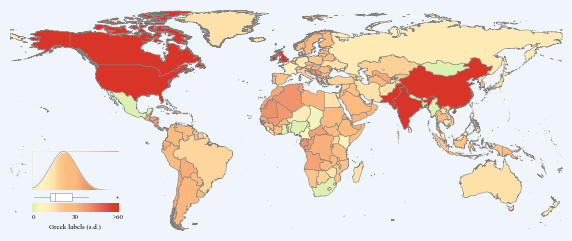

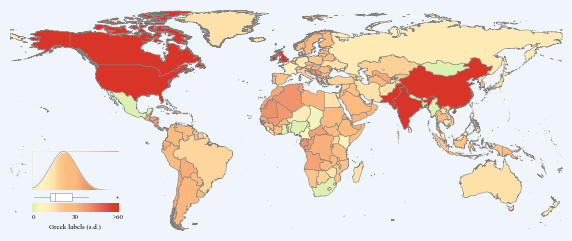

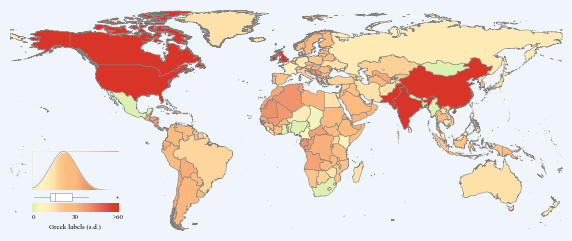

In [97]:
#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#FBBA7E','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=100)
# Word typical, pass in the personalization parameters related to the layered color.
# In this experiment, the X-axis data range is 0-100, and the interval is 1
color_bin = np.arange(-0.01,0.03,0.0001)
# print(color_bin)
fig,ax = plt.subplots(figsize = (10,6))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)

plt.xlim(-182,182)
plt.ylim(-58,86)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
plt.text(-113,-48,'>60',family = 'Times New Roman',fontsize = 7)
plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
plt.text(-140,-48,'30',family = 'Times New Roman',fontsize = 7)
plt.text(-155,-54,'Greek labels (s.d.)',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# colorbar
sm = plt.cm.ScalarMappable(cmap=mycmaps)
position=fig.add_axes([0.16, 0.29, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
cb.outline.set_visible(False)
cb.set_ticks([])  # Get rid of the scale

# Box figure
ax1 = fig.add_axes([0.156,0.27,0.128,0.11])# position[xmin,xmax,ymin,ymax]
# Take the data on the interval (0,60]
# print(data['normalization'][2:193])
f = ax1.boxplot(
    # The drawing data
    x = data['normalization'][6:215],
    vert = False,
    widths=0.18,
    patch_artist=True,
    boxprops = {'color':'gray','facecolor':'white','linewidth':'0.5'},
    showcaps=False,
    flierprops = {'marker':'o','markerfacecolor':'black','color':'black','markersize':'0.5'},
    medianprops= {'linestyle':'-','color':'gray','linewidth':'0.5'},
    whiskerprops={'color':'gray','linewidth':'0.5'}
    )
ax1.axis('off')  # Get rid of the scale

x = data['number'][0:10]
y = data['count'][0:10]
# Use scipy. Interpolate. Spline to fit the curve
x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between x.min and x.max
y_smooth = make_interp_spline(x,y)(x_new)

# Normal distribution diagram
ax2 = fig.add_axes([0.16,0.34,0.12,0.09])# position[xmin,xmax,ymin,ymax]
ax2.set(xlim=(0,max(x_new)), ylim=(-0.003,max(y_smooth)+0.001), autoscale_on=False)
# Color mapping fills the area under the curve
a = np.array([color_bin,color_bin])
ax2.imshow(a, interpolation='bicubic', extent=(0,max(x_new), -0.003,max(y_smooth)),cmap=mycmaps,aspect='auto')
# The background color fills part of the area on the curve
ax2.fill_between(x_new,y_smooth,max(y_smooth),color='#EFF5FA')
ax2.plot(x_new,y_smooth,color='gray',linestyle='-',linewidth=0.5)
ax2.axis('off')  # Get rid of the scale

# plt.show()
plt.savefig('picture/result_mycmaps_dpi=150.jpg', bbox_inches='tight', pad_inches = 0,dpi=150)
plt.savefig('picture/result_mycmaps_dpi=150.png', bbox_inches='tight', pad_inches = 0,dpi=150)
plt.savefig('picture/result_mycmaps_dpi=150.tiff', bbox_inches='tight', pad_inches = 0,dpi=150)

fig,ax = plt.subplots(figsize = (10,6))
merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds =
        {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)
plt.xlim(-182,182)
plt.ylim(-58,86)

plt.axis('off')  # Get rid of the scale

# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
plt.text(-113,-48,'>60',family = 'Times New Roman',fontsize = 7)
plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
plt.text(-140,-48,'30',family = 'Times New Roman',fontsize = 7)
plt.text(-155,-54,'Greek labels (s.d.)',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sm = mpl.cm.ScalarMappable(cmap=mycmaps)
position=fig.add_axes([0.16, 0.29, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,drawedges=False,orientation='horizontal')#The direction of colorbar
cb.outline.set_visible(False)
cb.set_ticks([])  # Get rid of the axes

# Box figure
ax1 = fig.add_axes([0.156,0.27,0.128,0.11])# position[xmin,xmax,ymin,ymax]
# Take the data on the interval (0,60]
# print(data['normalization'][2:193])
f = ax1.boxplot(
    # The drawing data
    x = data['normalization'][6:215],
    vert = False,
    widths=0.18,
    patch_artist=True,
    # showfliers=False,
    boxprops = {'color':'gray','facecolor':'white','linewidth':'0.5'},
    showcaps=False,
    flierprops = {'marker':'o','markerfacecolor':'black','color':'black','markersize':'0.5'},
    medianprops= {'linestyle':'-','color':'gray','linewidth':'0.5'},
    whiskerprops={'color':'gray','linewidth':'0.5'}
    )
ax1.axis('off')  # Get rid of the axes

# Normal distribution diagram
ax2 = fig.add_axes([0.16,0.34,0.12,0.09])# position[xmin,xmax,ymin,ymax]
ax2.set(xlim=(0,max(x_new)), ylim=(-0.003,max(y_smooth)+0.001), autoscale_on=False)
# Color mapping fills the area under the curve
a = np.array([color_bin,color_bin])
ax2.imshow(a, interpolation='bicubic', extent=(0,max(x_new), -0.003,max(y_smooth)),cmap=mycmaps,aspect='auto')
# The background color fills part of the area on the curve
ax2.fill_between(x_new,y_smooth,max(y_smooth),color='#EFF5FA')
ax2.plot(x_new,y_smooth,color='gray',linestyle='-',linewidth=0.5)
ax2.axis('off')  # Get rid of the axes

plt.savefig('picture/result_mycmaps_dpi=300.jpg', bbox_inches='tight',pad_inches = 0,dpi=300)
plt.savefig('picture/result_mycmaps_dpi=300.png', bbox_inches='tight', pad_inches = 0,dpi=300)
plt.savefig('picture/result_mycmaps_dpi=300.tiff', bbox_inches='tight', pad_inches = 0,dpi=300)

fig,ax = plt.subplots(figsize = (10,6))

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)
plt.xlim(-182,182)
plt.ylim(-58,86)

plt.axis('off')  # Get rid of the axes

# background color
fig.set_facecolor("#EFF5FA")
# # Colorbar label
plt.text(-113,-48,'>60',family = 'Times New Roman',fontsize = 7)
plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
plt.text(-140,-48,'30',family = 'Times New Roman',fontsize = 7)
plt.text(-155,-54,'Greek labels (s.d.)',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sm = plt.cm.ScalarMappable(cmap=mycmaps)
position=fig.add_axes([0.16, 0.29, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
cb.outline.set_visible(False)
cb.set_ticks([])  # Get rid of the axes

# Box figure
ax1 = fig.add_axes([0.156,0.27,0.128,0.11])# position[xmin,xmax,ymin,ymax]
# Take the data on the interval (0,60]
# print(data['normalization'][2:193])
f = ax1.boxplot(
    # The drawing data
    x = data['normalization'][6:215],
    vert = False,
    widths=0.18,
    patch_artist=True,
    # showfliers=False,
    boxprops = {'color':'gray','facecolor':'white','linewidth':'0.5'},
    showcaps=False,
    flierprops = {'marker':'o','markerfacecolor':'black','color':'black','markersize':'0.5'},
    medianprops= {'linestyle':'-','color':'gray','linewidth':'0.5'},
    whiskerprops={'color':'gray','linewidth':'0.5'}
    )
ax1.axis('off')  # Get rid of the axes

# Normal distribution diagram
ax2 = fig.add_axes([0.16,0.34,0.12,0.09])# position[xmin,xmax,ymin,ymax]
ax2.set(xlim=(0,max(x_new)), ylim=(-0.003,max(y_smooth)+0.001), autoscale_on=False)
# Color mapping fills the area under the curve
a = np.array([color_bin,color_bin])
ax2.imshow(a, interpolation='bicubic', extent=(0,max(x_new), -0.003,max(y_smooth)),cmap=mycmaps,aspect='auto')
# The background color fills part of the area on the curve
ax2.fill_between(x_new,y_smooth,max(y_smooth),color='#EFF5FA')
ax2.plot(x_new,y_smooth,color='gray',linestyle='-',linewidth=0.5)
ax2.axis('off')  # Get rid of the axes

plt.savefig('picture/result_mycmaps_dpi=150.svg', bbox_inches='tight', pad_inches = 0,dpi=150)
plt.savefig('picture/result_mycmaps_dpi=300.svg', bbox_inches='tight', pad_inches = 0,dpi=300)